In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
d = pd.read_csv("/content/CapstoneDataSet.csv")
d.head()

,Cust_Id,Rating,Movie_Id,Genre,MovieName
0,1488844,3.0,1.0,Action,Dinosaur Planet
1,822109,5.0,1.0,Action,Dinosaur Planet
2,885013,4.0,1.0,Action,Dinosaur Planet
3,30878,4.0,1.0,Action,Dinosaur Planet
4,823519,3.0,1.0,Action,Dinosaur Planet


In [46]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928629 entries, 0 to 928628
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Cust_Id    928629 non-null  int64  
 1   Rating     928628 non-null  float64
 2   Movie_Id   928628 non-null  float64
 3   Genre      928628 non-null  object 
 4   MovieName  928628 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 35.4+ MB


In [4]:
d

,Cust_Id,Rating,Movie_Id,Genre,MovieName
0,1488844,3,1,Action,Dinosaur Planet
1,822109,5,1,Action,Dinosaur Planet
2,885013,4,1,Action,Dinosaur Planet
3,30878,4,1,Action,Dinosaur Planet
4,823519,3,1,Action,Dinosaur Planet
...,...,...,...,...,...
536612,525411,4,156,Drama,Husbands and Wives
536613,614036,4,156,Drama,Husbands and Wives
536614,1064540,4,156,Drama,Husbands and Wives
536615,351002,3,156,Drama,Husbands and Wives


In [5]:
d['Genre']=d['Genre'].fillna(d['Genre'].mode)

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536617 entries, 0 to 536616
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Cust_Id    536617 non-null  int64 
 1   Rating     536617 non-null  int64 
 2   Movie_Id   536617 non-null  int64 
 3   Genre      536617 non-null  object
 4   MovieName  536617 non-null  object
dtypes: int64(3), object(2)
memory usage: 20.5+ MB


In [7]:
titles = d[['MovieName','Movie_Id']] 
titles

,MovieName,Movie_Id
0,Dinosaur Planet,1
1,Dinosaur Planet,1
2,Dinosaur Planet,1
3,Dinosaur Planet,1
4,Dinosaur Planet,1
...,...,...
536612,Husbands and Wives,156
536613,Husbands and Wives,156
536614,Husbands and Wives,156
536615,Husbands and Wives,156


In [8]:
d.shape

(536617, 5)

In [9]:
#To find the distribution of different ratings in the datset

p = d.groupby('Rating')['Rating'].agg(['count'])
p

,count
Rating,
1,27177
2,56557
3,158864
4,186540
5,107479


In [10]:
#To find the distribution of different genre in the datset

g = d.groupby('Genre')['Rating'].count().reset_index()
g

,Genre,Rating
0,Action,547
1,Animation,82158
2,Biography,56868
3,Comedy,145
4,Crime,47810
5,Documentary,32173
6,Drama,9555
7,Educational,11780
8,Fan,7422
9,Fiction,1019


In [11]:
##1. Find out the list of most popular and liked genre
##Answer)Historical with 240327 ratings 
g.sort_values(by='Rating')

,Genre,Rating
16,Romance,142
3,Comedy,145
0,Action,547
9,Fiction,1019
12,Horror,2012
17,Sci-Fi,6319
8,Fan,7422
13,Mystery,8901
6,Drama,9555
18,Thriller,9588


In [12]:
g2 = d.loc[d['Rating']==5] #agg(['count'])
g2

,Cust_Id,Rating,Movie_Id,Genre,MovieName
1,822109,5,1,Action,Dinosaur Planet
11,2207774,5,1,Action,Dinosaur Planet
19,372233,5,1,Action,Dinosaur Planet
27,814701,5,1,Action,Dinosaur Planet
29,662870,5,1,Action,Dinosaur Planet
...,...,...,...,...,...
536592,1486688,5,156,Drama,Husbands and Wives
536596,2455789,5,156,Drama,Husbands and Wives
536598,928059,5,156,Drama,Husbands and Wives
536607,1407688,5,156,Drama,Husbands and Wives


In [13]:
g3 = g2.groupby('Genre')['Rating'].count().reset_index()
g3

,Genre,Rating
0,Action,145
1,Animation,12760
2,Biography,12453
3,Comedy,41
4,Crime,10944
5,Documentary,4885
6,Drama,1593
7,Educational,3611
8,Fan,1221
9,Fiction,153


In [14]:
##3. Find what Genre Movies have received the best and worst ratings based on User Rating.
##Answer)Best genre = Historical with 66211 '5' star ratings.
##Answer)Worst genre = Comedy with 16 '1' star ratings.

g3.sort_values(by='Rating')

,Genre,Rating
16,Romance,19
3,Comedy,41
0,Action,145
9,Fiction,153
12,Horror,357
18,Thriller,1145
13,Mystery,1198
8,Fan,1221
6,Drama,1593
17,Sci-Fi,1889


In [15]:
g4 = d.loc[d['Rating']==1] #agg(['count'])
g4

,Cust_Id,Rating,Movie_Id,Genre,MovieName
40,1009622,1,1,Action,Dinosaur Planet
50,1578279,1,1,Action,Dinosaur Planet
64,1493697,1,1,Action,Dinosaur Planet
80,1926776,1,1,Action,Dinosaur Planet
85,769643,1,1,Action,Dinosaur Planet
...,...,...,...,...,...
536513,1428930,1,156,Drama,Husbands and Wives
536517,1666062,1,156,Drama,Husbands and Wives
536545,2294689,1,156,Drama,Husbands and Wives
536556,586652,1,156,Drama,Husbands and Wives


In [16]:
g5=g4.groupby('Genre')['Rating'].count().reset_index()
g5

,Genre,Rating
0,Action,28
1,Animation,5457
2,Biography,2956
3,Comedy,16
4,Crime,1888
5,Documentary,1966
6,Drama,803
7,Educational,654
8,Fan,650
9,Fiction,173


In [17]:
##3. Find what Genre Movies have received the best and worst ratings based on User Rating.
##Answer)Best genre = Historical with 66211 '5' star ratings.
##Answer)Worst genre = Comedy with 16 '1' star ratings.
g5.sort_values(by='Rating')

,Genre,Rating
3,Comedy,16
0,Action,28
16,Romance,30
12,Horror,73
9,Fiction,173
17,Sci-Fi,581
14,Other,611
8,Fan,650
7,Educational,654
6,Drama,803


In [18]:
# get customer count

cust_count = d['Cust_Id'].nunique()
cust_count

218776

In [19]:
# get movie count

movie_count = d['MovieName'].nunique()
movie_count

157

In [20]:
# get rating count

rating_count = d['Cust_Id'].count() 

rating_count

536617

In [21]:
# get genre count

genre_count = d['Genre'].nunique() 

genre_count

20

Text(0.5, 1.0, 'Total pool: 157 Movies, 218776 customers, 536617 ratings given')

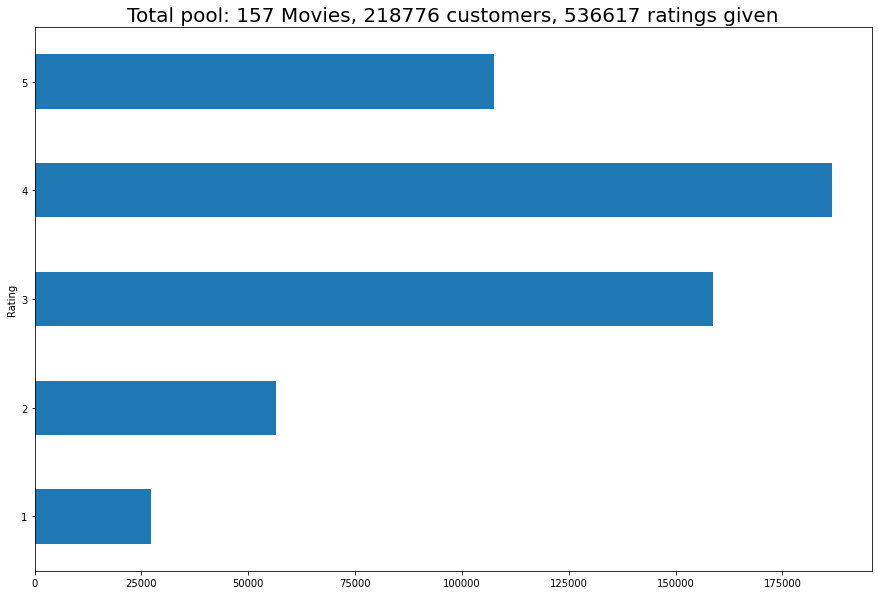

In [22]:
## To plot the distribution of the ratings in as a bar plot
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)


In [23]:
#To create a list of all the movies rated less often(only include top 30% rated movies)


f = ['count','mean']
dataset_movie_summary = d.groupby('Movie_Id')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1196.0


In [24]:
dataset_movie_summary = d.groupby('Movie_Id')['Rating'].agg(f)
dataset_movie_summary.index = dataset_movie_summary.index.map(int)
dataset_movie_summary.head()

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298


In [25]:
dataset_movie_summary.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            147, 148, 149, 150, 151, 152, 153, 154, 155, 156],
           dtype='int64', name='Movie_Id', length=156)

In [26]:
#To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = d.groupby('Cust_Id')['Rating'].agg(f) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
#                                           6                       <  5
#drop_cust_list[3,4]
print(f'Customer minimum times of review: {cust_benchmark}')



Customer minimum times of review: 3.0


In [27]:
print(f'Original Shape: {d.shape}')


Original Shape: (536617, 5)


In [28]:
d = d[~d['Movie_Id'].isin(drop_movie_list)]

d = d[~d['Cust_Id'].isin(drop_cust_list)]

print('After Trim Shape: {}'.format(d.shape))

After Trim Shape: (309738, 5)


In [29]:
print('-Data Examples-')
d.head()

-Data Examples-


,Cust_Id,Rating,Movie_Id,Genre,MovieName
693,712664,5,3,Horror,Character
694,1331154,4,3,Horror,Character
696,44937,5,3,Horror,Character
697,656399,4,3,Horror,Character
698,439011,1,3,Horror,Character


In [30]:
##Create ratings matrix for 'ratings' matrix with Rows = userId, Columns = movieId

df_p = pd.pivot_table(d,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(68067, 47)


In [31]:
df_p.head()

Movie_Id,3,8,16,17,18,24,25,26,28,30,...,118,122,125,127,133,138,143,148,152,156
Cust_Id,,,,,,,,,,,,,,,,,,,,,
7,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN


In [32]:
titles = d[['MovieName','Movie_Id']] 
titles

,MovieName,Movie_Id
693,Character,3
694,Character,3
696,Character,3
697,Character,3
698,Character,3
...,...,...
536612,Husbands and Wives,156
536613,Husbands and Wives,156
536614,Husbands and Wives,156
536615,Husbands and Wives,156


In [33]:
titles.index = titles['Movie_Id']
titles

,MovieName,Movie_Id
Movie_Id,,
3,Character,3
3,Character,3
3,Character,3
3,Character,3
3,Character,3
...,...,...
156,Husbands and Wives,156
156,Husbands and Wives,156
156,Husbands and Wives,156


In [34]:
del titles['Movie_Id']

In [35]:
titles

,MovieName
Movie_Id,
3,Character
3,Character
3,Character
3,Character
3,Character
...,...
156,Husbands and Wives
156,Husbands and Wives
156,Husbands and Wives


In [36]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 10.4 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633986 sha256=5d5f92064fd594b6d3675b1a97775c4bbcdf30675b623ba733f8cbabd07567a8
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [37]:
import math

import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [38]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(d[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9942  0.9934  0.9963  0.9946  0.0012  
MAE (testset)     0.7960  0.7928  0.7998  0.7962  0.0029  
Fit time          5.38    7.96    15.32   9.55    4.21    
Test time         0.25    1.23    0.84    0.77    0.40    


{'test_rmse': array([0.99415533, 0.99340563, 0.99629184]),
 'test_mae': array([0.79598564, 0.79279925, 0.79977414]),
 'fit_time': (5.37770676612854, 7.9622962474823, 15.319083452224731),
 'test_time': (0.2524721622467041, 1.2312572002410889, 0.836859941482544)}

In [39]:
d.head()

,Cust_Id,Rating,Movie_Id,Genre,MovieName
693,712664,5,3,Horror,Character
694,1331154,4,3,Horror,Character
696,44937,5,3,Horror,Character
697,656399,4,3,Horror,Character
698,439011,1,3,Horror,Character


In [40]:
## To find all the movies rated as 5 stars by user with userId = 712664

In [41]:
#dataset_712664 = d[(d['Cust_Id'] == 712664) & (d['Rating'] == 5)]
#dataset_712664 = dataset_712664.set_index('Movie_Id')
#dataset_712664 = dataset_712664.join(titles)['Name']
#dataset_712664.head(10)

In [42]:
# Train an SVD to predict ratings for user with userId = 712664


In [43]:
titles.head()

,MovieName
Movie_Id,
3,Character
3,Character
3,Character
3,Character
3,Character


In [44]:
# Create a shallow copy for the movies dataset
user_712664 = titles.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often 
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
data = Dataset.load_from_df(d[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(20))

          MovieName  Estimate_Score
147766  Invader Zim        4.774591
147851  Invader Zim        4.774591
147689  Invader Zim        4.774591
147688  Invader Zim        4.774591
147687  Invader Zim        4.774591
147686  Invader Zim        4.774591
147685  Invader Zim        4.774591
147684  Invader Zim        4.774591
147683  Invader Zim        4.774591
147682  Invader Zim        4.774591
147681  Invader Zim        4.774591
147680  Invader Zim        4.774591
147679  Invader Zim        4.774591
147678  Invader Zim        4.774591
147677  Invader Zim        4.774591
147676  Invader Zim        4.774591
147675  Invader Zim        4.774591
147674  Invader Zim        4.774591
147673  Invader Zim        4.774591
147672  Invader Zim        4.774591
